In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [125]:
wine = load_wine()

In [126]:
X = wine.data
y = wine.target

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=1)

# LogisticReggerssion


In [128]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [129]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.9722222222222222

In [130]:
logi = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
logi

0.9504761904761905

# PCA applied


In [131]:
pipe_lr_pca = make_pipeline(StandardScaler(), PCA(n_components=5), LogisticRegression())
pipe_lr_pca.fit(X_train,y_train)
pipe_lr_pca.score(X_test, y_test)

0.9722222222222222

In [132]:
pcaRes = cross_val_score(estimator=pipe_lr_pca, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
pcaRes

0.9857142857142858

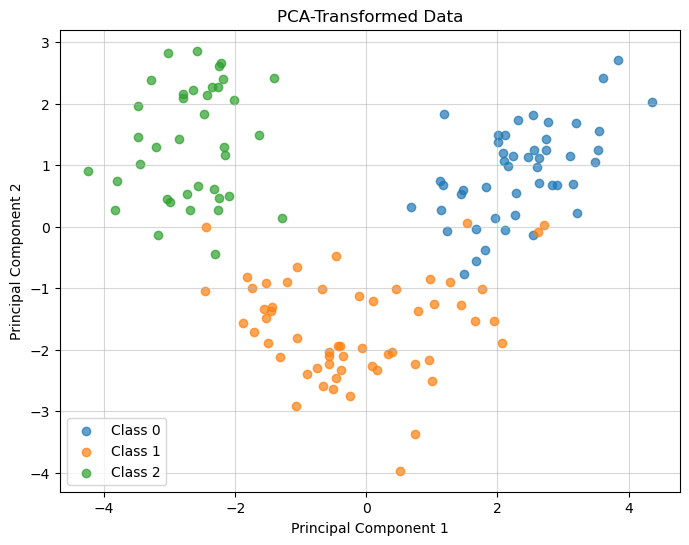

In [140]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_std, y_train)


# fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    plt.scatter(
        X_pca[y_train == label, 0],
        X_pca[y_train == label, 1],
        label = f'Class {label}',
        alpha = 0.7
    )
    
plt.title('PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.5)
plt.show()
    

# LDA applied


In [134]:
pipe_lr_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), LogisticRegression())
pipe_lr_lda.fit(X_train,y_train)
pipe_lr_lda.score(X_test, y_test)

0.9722222222222222

In [135]:
LDARes = cross_val_score(estimator=pipe_lr_lda, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
LDARes

0.9861904761904763

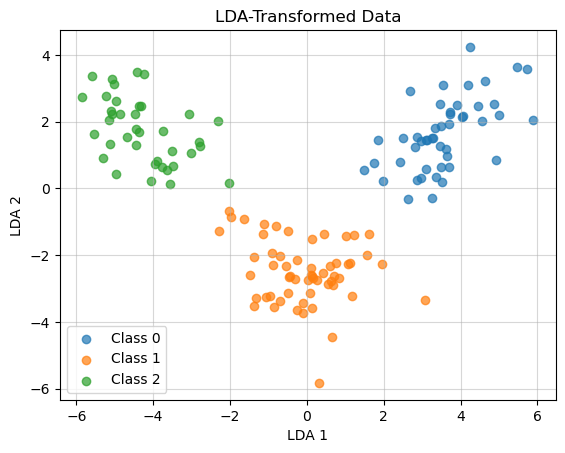

In [141]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train_std, y_train)

for label in np.unique(y_train):
    plt.scatter(
        X_lda[y_train == label, 0],
        X_lda[y_train == label, 1],
        label = f'Class {label}',
        alpha=0.7
    )
plt.title('LDA-Transformed Data')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.grid(alpha=0.5)
plt.show()
    